# Multivariate plotting

<table>
<tr>
<td><img src="https://i.imgur.com/gJ65O47.png" width="350px"/></td>
<td><img src="https://i.imgur.com/3qEqPoD.png" width="350px"/></td>
<td><img src="https://i.imgur.com/1fmV4M2.png" width="350px"/></td>
<td><img src="https://i.imgur.com/H20s88a.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Multivariate Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Grouped Box Plot</td>
<td style="font-weight:bold; font-size:16px;">Heatmap</td>
<td style="font-weight:bold; font-size:16px;">Parallel Coordinates</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.box()</td>
<td>sns.heatmap</td>
<td>pd.plotting.parallel_coordinates</td>
</tr>
<!--
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
-->
</table>

在本教程的大部分内容中，我们一直在一个（单变量）或两个（双变量）维度中绘制数据。 在上一节中，我们探讨了分面：一种多变量绘图方法，它通过“网格化”数据来工作。

在本节中，我们将进一步深入研究多变量绘图。 首先，我们将探索“真正的”多变量图表。 然后我们将研究一些使用汇总的图来获得相同的东西。

In [1]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("./input/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


（注意：上面的第一个代码单元包含一些数据预处理。这是无关紧要的，所以我默认隐藏了它。）

In [2]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


## Adding more visual variables

绘制大量变量的最明显的方法是使用更多[视觉变量](http://www.infovis-wiki.net/index.php?title=Visual_Variables)来规划我们迄今为止一直使用的可视化。 A **视觉变量**是我们可用于在感知上将两个数据元素彼此区分开的任何视觉维度或标记。 示例包括尺寸，颜色，形状以及一维，二维甚至三维位置。

“好的”多变量数据显示是有效，易于解释地使用这些参数的数据。

### Multivariate scatter plots(多变量散点图)

我们来看一些例子。 我们将从散点图开始。 我们有兴趣看看哪种类型的进攻球员最有可能获得报酬：前锋，右边锋还是左边锋。

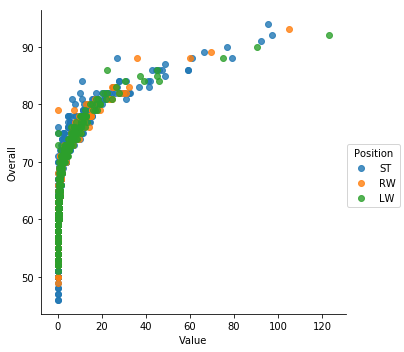

In [5]:
import seaborn as sns

sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

此散点图使用三个可视变量。 水平位置（x值）跟踪玩家的“价值”（他们的支付程度）。 垂直位置（y值）跟踪所有属性中玩家的“总体”得分。 并且颜色（“hue”参数）跟踪该点代表的玩家所关注的三个类别中的哪一个。

此图表中的新变量是**颜色**。 颜色提供了美观的视觉效果，但使用起来很棘手。 看一下这个散点图，我们看到了前面几节中看到的相同的过度绘图问题。 但我们不再有一个简单的解决方案，例如使用十六进制图，因为颜色在该设置中没有意义。

另一个视觉变量示例是**形状**。 形状控制，以及标记的形状：

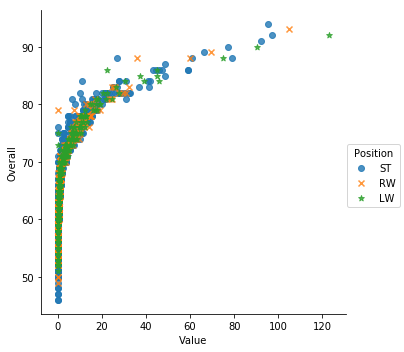

In [6]:
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

`seaborn`是关于你应该使用什么类型的视觉变量的观点，并且不经常提供形状选项。 这是因为简单的形状虽然漂亮，但在其可区分性方面在感知上不如颜色。

### Grouped box plot(分组框图)

另一个示范图是分组框图。 该图利用**分组**。 假设我们对以下问题感兴趣：Strikers在“侵略”中得分高于守门员吗？

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


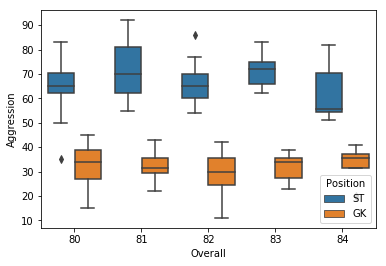

In [8]:
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

正如你所看到的，这个情节最终证明了在我们的数据集中，守门员（至少那些总得分在80到85之间）的攻击得分比攻击者低得多。

在该图中，水平轴编码“整体”分数，垂直轴编码“侵略”分数，分组编码“位置”。

分组是一个极具沟通性的视觉变量：它使得这个图表很容易理解。 但是，它的基数非常低：很难使用组来匹配少数几个分类值。 在这个情节中，我们只选择了两个玩家位置和五个整体玩家得分，并且可视化已经相当拥挤。 总体而言，分组与其能够做什么和不能做什么非常相似。

## Summarization(摘要)

在不损害其可解释性的情况下很难将足够的尺寸压缩到图上。 非常繁忙的情节自然很难解释。 因此，高度多变量可能难以使用。

在绕过这个问题的同时绘制许多数据集特征的另一种方法是使用**摘要**。 摘要是通过混合和匹配旧变量提供的信息来创建和添加新变量。

摘要是数据可视化中的一种有用技术，因为它允许我们将可能非常复杂的关系“归结”为更简单的关系。

### Heatmap(热图)

可能最常用的摘要可视化是**相关图**，其中测量数据集中每对值之间的相关性并绘制颜色结果。

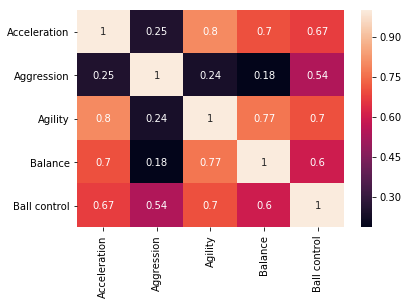

In [9]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)

该图中的每个单元格是两个变量的交集; 它的颜色和标签一起表示两个变量之间的*相关*的量（两个变量同时增加或减少的可能性）。 例如，在此数据集中，Agility和Acceleration是高度相关的，而Aggression和 Balanced是非常不相关的。

相关图是特定类型的**热图**。 热图会映射您从数据集中选择的每对变量的一个特定事实（在本例中为相关性）。

### Parallel Coordinates(平行坐标)

**平行坐标图**提供了跨多个变量可视化数据的另一种方法。

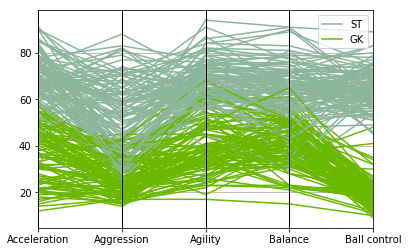

In [10]:
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')

在上面的可视化中，我们在我们感兴趣的五个变量上绘制了200个守门员（深绿色）和前锋（浅绿色）的样本。

平行坐标图非常适合确定数据中可区分的不同类。 他们将变量从上到下标准化......在这种情况下，我们看到前锋几乎在我们选择的所有变量上得到了更高的评分，这意味着这两类玩家很容易区分。

## Exercises

In [12]:
pokemon = pd.read_csv("./input/pokemon.csv", index_col=0)
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


尝试回答以下问题。

1.创建多变量数据视觉的三种技术是什么？  
2.列举三个视觉变量的例子。  
3.数据可视化中的摘要如何工作？

1.我们在本教程中介绍的三种技术是分面，使用更多的可视变量和摘要。

2.视觉变量的一些示例是形状，颜色，大小，x位置，y位置和分组。 然而，还有更多可能！

3.在数据可视化中，摘要通过将复杂数据压缩为更简单，更易于绘制的指标来工作。

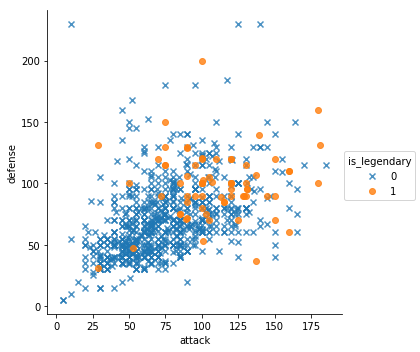

In [14]:
import seaborn as sns

sns.lmplot(x='attack', y='defense', hue='is_legendary', 
           markers=['x', 'o'],
           fit_reg=False, data=pokemon)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


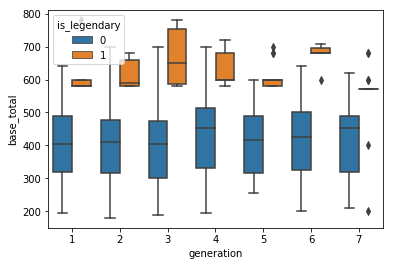

In [17]:
sns.boxplot(x="generation", y="base_total", hue='is_legendary', data=pokemon)

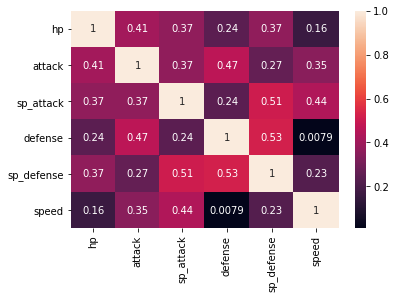

In [19]:
sns.heatmap(
    pokemon.loc[:, ['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed']].corr(),
    annot=True
)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


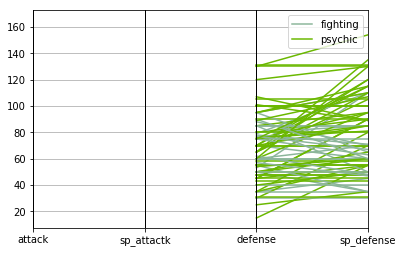

In [20]:
import pandas as pd
from pandas.plotting import parallel_coordinates

p = (pokemon[(pokemon['type1'].isin(["psychic", "fighting"]))]
         .loc[:, ['type1', 'attack', 'sp_attactk', 'defense', 'sp_defense']]
    )

parallel_coordinates(p, 'type1')

In [16]:
pokemon.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

# Conclusion(结论)

在本教程中，我们通过深入研究其他两种多变量数据可视化技术，对最后一节中介绍的分面进行了跟进。

第一种技术，添加更多的视觉变量，导致更复杂但可能更详细的图。 第二种技术摘要将可变信息压缩为摘要统计，从而产生简单的输出 - 尽管以表达性为代价。

分面，添加视觉变量和摘要是我们将在本教程中介绍的三种多变量技术。

本教程中的其余内容是可选的。 在下一节中，我们将学习使用`plotly`，这是一个非常流行的交互式可视化库，它基于这些库构建。